# Jonathan Halverson
# Tuesday, April 19, 2016
# K-Means applied to wine data

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('halverson')

In [8]:
df = pd.read_csv('wine.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Standardize the data and convert to NumPy

In [9]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_std = stdsc.fit_transform(df.iloc[:, 1:].values)
y = df.iloc[:, 0].values - 1

Let's print the features:

In [10]:
np.set_printoptions(precision=2, linewidth=100)
print X_std[:5]

[[ 1.52 -0.56  0.23 -1.17  1.91  0.81  1.03 -0.66  1.22  0.25  0.36  1.85  1.01]
 [ 0.25 -0.5  -0.83 -2.49  0.02  0.57  0.73 -0.82 -0.54 -0.29  0.41  1.11  0.97]
 [ 0.2   0.02  1.11 -0.27  0.09  0.81  1.22 -0.5   2.14  0.27  0.32  0.79  1.4 ]
 [ 1.69 -0.35  0.49 -0.81  0.93  2.49  1.47 -0.98  1.03  1.19 -0.43  1.18  2.33]
 [ 0.3   0.23  1.84  0.45  1.28  0.81  0.66  0.23  0.4  -0.32  0.36  0.45 -0.04]]


### K-Means

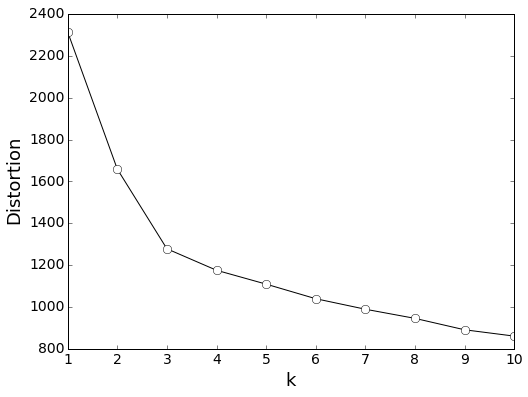

In [11]:
from sklearn.cluster import KMeans

k_range = range(1, 11)
distortions = []
for k in k_range:
    km = KMeans(n_clusters=k, init='k-means++', n_init=25)
    km.fit(X_std)
    distortions.append(km.inertia_)
plt.plot(k_range, distortions, 'k-', marker='o', mfc='w')
plt.xlabel('k')
plt.ylabel('Distortion')

Using the elbow method, we would conclude that there are 3 clusters and this agrees with the known number of classes.

In [12]:
from sklearn.metrics import accuracy_score

km = KMeans(n_clusters=3, init='k-means++', n_init=25, random_state=0)
accuracy_score(km.fit_predict(X_std), y[::-1])

0.848314606741573

It was necessary to reverse the target array because of the labels that were assigned to the different clusters. In general, KMeans is unsupervised.